#Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#Data Preprocessing

In [56]:
# Load the dataset
df = pd.read_csv('games.csv')

# Select relevant predictor variables
predictor_columns = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home',  'AST_home', 'REB_home',
                      'HOME_TEAM_WINS']

# Subset the DataFrame with relevant columns
df = df[predictor_columns]

df['HOME_TEAM_WINS'] = df['HOME_TEAM_WINS'].astype('str')

# Remove rows with missaing values
df = df.dropna()

# Separate features (X) and target variable (y)
X = df.drop('HOME_TEAM_WINS', axis=1)
y = df['HOME_TEAM_WINS']

In [57]:
win_counts = df['HOME_TEAM_WINS'].value_counts()
print(win_counts)

1    15645
0    10907
Name: HOME_TEAM_WINS, dtype: int64


#Logistic Regression

In [48]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1042)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(random_state=8899)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.76

Confusion Matrix:
[[2202 1075]
 [ 870 3819]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      3277
           1       0.78      0.81      0.80      4689

    accuracy                           0.76      7966
   macro avg       0.75      0.74      0.75      7966
weighted avg       0.75      0.76      0.75      7966



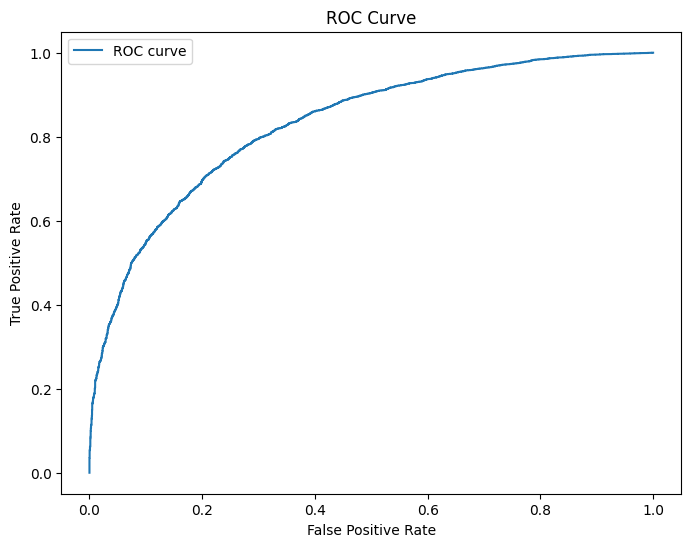

AUC Score: 0.83


In [50]:


# Plot ROC curve
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test.astype(int), y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate and print AUC score
auc_score = roc_auc_score(y_test.astype(int), y_probs)
print(f'AUC Score: {auc_score:.2f}')


In [51]:
# Example of tuning C parameter
for c_value in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=c_value, random_state=8899)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'C={c_value}, Accuracy: {accuracy:.2f}')


C=0.001, Accuracy: 0.75
C=0.01, Accuracy: 0.75
C=0.1, Accuracy: 0.76
C=1, Accuracy: 0.76
C=10, Accuracy: 0.76
C=100, Accuracy: 0.76


#Decision Tree

In [52]:


# Load the dataset
df = pd.read_csv('games.csv')

# Select relevant predictor variables
predictor_columns = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home',  'AST_home', 'REB_home',
                     'HOME_TEAM_WINS']

# Subset the DataFrame with relevant columns
df = df[predictor_columns]

# Remove rows with missing values
df = df.dropna()

# Separate features (X) and target variable (y)
X = df.drop('HOME_TEAM_WINS', axis=1)
y = df['HOME_TEAM_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1042)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the decision tree model
tree_model = DecisionTreeClassifier(random_state=8899)
tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Decision Tree Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)



Decision Tree Accuracy: 0.67

Confusion Matrix:
[[1994 1283]
 [1326 3363]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.61      0.60      3277
           1       0.72      0.72      0.72      4689

    accuracy                           0.67      7966
   macro avg       0.66      0.66      0.66      7966
weighted avg       0.67      0.67      0.67      7966



#Support Vector Machine

In [55]:


# Load the dataset
df = pd.read_csv('games.csv')

# Select relevant predictor variables
predictor_columns = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'AST_home', 'REB_home', 'HOME_TEAM_WINS']

# Subset the DataFrame with relevant columns
df = df[predictor_columns]

# Remove rows with missing values
df = df.dropna()

# Separate features (X) and target variable (y)
X = df.drop('HOME_TEAM_WINS', axis=1)
y = df['HOME_TEAM_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1042)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(random_state=8899)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'SVM Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)



SVM Accuracy: 0.75

Confusion Matrix:
[[2111 1166]
 [ 786 3903]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      3277
           1       0.77      0.83      0.80      4689

    accuracy                           0.75      7966
   macro avg       0.75      0.74      0.74      7966
weighted avg       0.75      0.75      0.75      7966



#KNN

In [54]:


# Load the dataset
df = pd.read_csv('games.csv')

# Select relevant predictor variables
predictor_columns = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'AST_home', 'REB_home', 'HOME_TEAM_WINS']

# Subset the DataFrame with relevant columns
df = df[predictor_columns]

# Remove rows with missing values
df = df.dropna()

# Separate features (X) and target variable (y)
X = df.drop('HOME_TEAM_WINS', axis=1)
y = df['HOME_TEAM_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1042)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'KNN Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


KNN Accuracy: 0.72

Confusion Matrix:
[[2081 1196]
 [1034 3655]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65      3277
           1       0.75      0.78      0.77      4689

    accuracy                           0.72      7966
   macro avg       0.71      0.71      0.71      7966
weighted avg       0.72      0.72      0.72      7966

